# Detecção de Patologias Pulmonares com YOLOv8

Este projeto tem como objetivo aplicar modelos de deteção de objetos, especificamente o YOLOv8, para identificar patologias pulmonares em imagens de raio-X de tórax. Utiliza-se um modelo treinado previamente com dados médicos anotados.

A análise centra-se em identificar condições como **Fibrosis**, **Consolidation**, entre outras, com o objetivo de explorar o potencial de técnicas de visão computacional no apoio ao diagnóstico clínico.


## Montagem do Google Drive e Configuração Inicial

Nesta secção montamos o Google Drive para aceder aos pesos do modelo previamente treinado e às imagens de teste.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/apvc_yolo/chestx_det10_yolo.zip .
!unzip -q chestx_det10_yolo.zip

In [ ]:
!cp chestx_det10_yolo/data.yaml .

In [ ]:
!pip install ultralytics --quiet
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultraly

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')
model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    name='yolov8s_chest_improved',
    patience=20,
    lr0=0.0005,
    warmup_epochs=3,
    weight_decay=0.0001,
    hsv_v=0.4,        # variação de brilho
    mixup=0.1         # opcional
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_chest_improved2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.

train: Scanning /content/chestx_det10_yolo/labels/train.cache... 3001 images, 681 backgrounds, 0 corrupt: 100%|██████████| 3001/3001 [00:00<?, ?it/s]

train: /content/chestx_det10_yolo/images/train/57467.png: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1599.1±1023.2 MB/s, size: 404.5 KB)


val: Scanning /content/chestx_det10_yolo/labels/val.cache... 542 images, 83 backgrounds, 0 corrupt: 100%|██████████| 542/542 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8s_chest_improved2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0001), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8s_chest_improved2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.25G       2.17      3.724      2.094          6        640: 100%|██████████| 376/376 [00:43<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.75it/s]


                   all        542       1476      0.702     0.0661     0.0471      0.019

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.25G      2.101      3.137      2.039          5        640: 100%|██████████| 376/376 [00:39<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.22it/s]


                   all        542       1476      0.456      0.146     0.0704     0.0276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.25G      2.087      3.085      2.013          0        640: 100%|██████████| 376/376 [00:38<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.96it/s]


                   all        542       1476      0.522      0.105     0.0697     0.0293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.25G      2.033      2.996      1.937          6        640: 100%|██████████| 376/376 [00:38<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.03it/s]

                   all        542       1476      0.385      0.121     0.0827     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.25G      2.008      2.912      1.922          3        640: 100%|██████████| 376/376 [00:38<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.00it/s]


                   all        542       1476      0.468       0.16      0.102     0.0468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.25G      1.973      2.835       1.89          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.26it/s]

                   all        542       1476      0.344      0.153     0.0966      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.25G      1.954      2.764      1.876          5        640: 100%|██████████| 376/376 [00:37<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.90it/s]


                   all        542       1476      0.412       0.14      0.117     0.0527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.25G      1.923      2.722      1.827          0        640: 100%|██████████| 376/376 [00:38<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.68it/s]


                   all        542       1476       0.56      0.188      0.152     0.0667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.25G      1.905      2.685      1.844          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.16it/s]

                   all        542       1476      0.383      0.223       0.17      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.25G      1.895      2.617      1.823          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.94it/s]


                   all        542       1476      0.387      0.237       0.16     0.0754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.25G      1.872      2.592      1.801          8        640: 100%|██████████| 376/376 [00:38<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.99it/s]


                   all        542       1476      0.371      0.258      0.203      0.094

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.25G      1.877      2.574      1.805          3        640: 100%|██████████| 376/376 [00:38<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.93it/s]

                   all        542       1476      0.389      0.218      0.167     0.0777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.25G      1.857      2.563      1.815          0        640: 100%|██████████| 376/376 [00:38<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.28it/s]

                   all        542       1476      0.399      0.216      0.198     0.0982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.25G      1.861      2.547      1.785          6        640: 100%|██████████| 376/376 [00:37<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.94it/s]

                   all        542       1476       0.35      0.239      0.193      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.25G      1.848      2.517      1.794          4        640: 100%|██████████| 376/376 [00:37<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.90it/s]

                   all        542       1476      0.406      0.231      0.193     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.25G      1.818      2.444      1.762          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.47it/s]


                   all        542       1476      0.368      0.241      0.202     0.0968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.25G      1.799      2.386      1.753          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.72it/s]


                   all        542       1476       0.39      0.281       0.21     0.0948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.25G      1.809      2.427      1.755         10        640: 100%|██████████| 376/376 [00:38<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.29it/s]


                   all        542       1476      0.355      0.283      0.206     0.0997

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.25G      1.792        2.4      1.747          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.12it/s]


                   all        542       1476      0.374      0.283      0.236      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.25G      1.773      2.329      1.739          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.75it/s]


                   all        542       1476      0.415      0.303      0.244       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.25G       1.76      2.334       1.72          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.14it/s]

                   all        542       1476      0.299      0.304      0.244       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.25G      1.748      2.293      1.715          2        640: 100%|██████████| 376/376 [00:37<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.90it/s]


                   all        542       1476      0.363      0.322      0.264      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.25G      1.763      2.307      1.728          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.97it/s]


                   all        542       1476      0.383      0.284      0.243      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.27G      1.752       2.27      1.708          6        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.98it/s]

                   all        542       1476      0.326      0.294      0.246      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.27G      1.721      2.249      1.692          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.90it/s]

                   all        542       1476      0.434      0.304      0.264      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.27G      1.727      2.246      1.711          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.87it/s]

                   all        542       1476      0.353      0.315      0.265      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.27G      1.723      2.245      1.703          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.83it/s]


                   all        542       1476      0.363      0.309      0.263      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.27G      1.705      2.223      1.687          0        640: 100%|██████████| 376/376 [00:38<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.04it/s]

                   all        542       1476      0.361       0.32      0.277      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.27G      1.703      2.167      1.687          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.00it/s]


                   all        542       1476      0.322      0.306      0.276      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.27G      1.708      2.168      1.689         10        640: 100%|██████████| 376/376 [00:38<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.97it/s]


                   all        542       1476      0.408      0.345      0.298      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.27G        1.7      2.145      1.674          2        640: 100%|██████████| 376/376 [00:37<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.23it/s]


                   all        542       1476      0.351      0.334      0.282      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.27G       1.68      2.121      1.663          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.62it/s]

                   all        542       1476      0.387      0.342      0.301      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.27G      1.658      2.114      1.662          8        640: 100%|██████████| 376/376 [00:38<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.42it/s]


                   all        542       1476      0.397      0.314      0.293      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.27G      1.677      2.085      1.675          1        640: 100%|██████████| 376/376 [00:38<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.97it/s]


                   all        542       1476      0.393      0.378      0.312      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.27G      1.671      2.104      1.667          1        640: 100%|██████████| 376/376 [00:37<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.72it/s]


                   all        542       1476      0.401      0.329      0.307      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.27G      1.657      2.055      1.657         10        640: 100%|██████████| 376/376 [00:38<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.79it/s]


                   all        542       1476      0.427      0.334      0.293      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.27G      1.649      2.057      1.649          3        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.19it/s]


                   all        542       1476      0.401      0.332      0.302      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.27G      1.643      2.006      1.634          9        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.27it/s]


                   all        542       1476      0.427      0.334      0.314      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.27G      1.628      2.009      1.634         11        640: 100%|██████████| 376/376 [00:38<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.01it/s]

                   all        542       1476      0.369      0.364      0.304      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.27G      1.617      1.975      1.625          1        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.24it/s]


                   all        542       1476      0.479      0.333       0.33      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.27G      1.614      1.979      1.619          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.36it/s]


                   all        542       1476      0.387      0.343      0.302      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.27G      1.609       1.97      1.623          1        640: 100%|██████████| 376/376 [00:37<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.09it/s]


                   all        542       1476      0.435      0.359      0.346      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.27G      1.604      1.958      1.612          1        640: 100%|██████████| 376/376 [00:38<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.47it/s]


                   all        542       1476      0.391      0.329      0.305      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.27G       1.59      1.922      1.607          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.22it/s]

                   all        542       1476      0.462      0.341      0.334      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.27G      1.587       1.94      1.613          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.57it/s]


                   all        542       1476      0.436      0.325      0.327      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.27G      1.585      1.897      1.607          6        640: 100%|██████████| 376/376 [00:38<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.98it/s]

                   all        542       1476      0.456      0.383      0.353      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.27G      1.568      1.884      1.601          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.87it/s]

                   all        542       1476      0.456      0.357      0.345      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.27G       1.57      1.871      1.595          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.45it/s]


                   all        542       1476      0.456       0.37      0.348      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.27G      1.567      1.837      1.584          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.01it/s]

                   all        542       1476      0.394      0.344      0.325      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.27G       1.56      1.856      1.585          3        640: 100%|██████████| 376/376 [00:38<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.38it/s]


                   all        542       1476      0.488      0.352      0.341      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.27G      1.554      1.835      1.575         12        640: 100%|██████████| 376/376 [00:38<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.51it/s]


                   all        542       1476      0.506      0.336       0.36      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.27G      1.518      1.759      1.563          1        640: 100%|██████████| 376/376 [00:38<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.92it/s]

                   all        542       1476      0.471      0.335      0.347      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.27G      1.527      1.758      1.562          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.41it/s]


                   all        542       1476      0.454      0.364      0.356      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.27G      1.525      1.757      1.552         12        640: 100%|██████████| 376/376 [00:38<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.99it/s]


                   all        542       1476      0.473      0.368      0.363      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.27G      1.515      1.746      1.562          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.47it/s]


                   all        542       1476      0.529      0.334      0.364      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.27G        1.5      1.737      1.552          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.36it/s]

                   all        542       1476      0.429      0.384      0.372      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.27G      1.484      1.703      1.532          0        640: 100%|██████████| 376/376 [00:38<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.93it/s]

                   all        542       1476      0.437      0.363      0.351      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.27G      1.489      1.681      1.539          3        640: 100%|██████████| 376/376 [00:38<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.49it/s]


                   all        542       1476      0.471       0.37      0.358      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.27G      1.486      1.687      1.542          8        640: 100%|██████████| 376/376 [00:38<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.05it/s]

                   all        542       1476      0.433      0.375      0.363      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.27G      1.486      1.697      1.533          3        640: 100%|██████████| 376/376 [00:38<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.35it/s]

                   all        542       1476      0.477      0.355      0.366      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.27G      1.472      1.675       1.53          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.26it/s]


                   all        542       1476      0.451      0.371      0.373      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.27G      1.451       1.64      1.517          6        640: 100%|██████████| 376/376 [00:38<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.05it/s]

                   all        542       1476      0.486      0.362      0.378      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.27G      1.437      1.605      1.511          8        640: 100%|██████████| 376/376 [00:38<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.47it/s]

                   all        542       1476      0.452      0.377      0.366      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.27G      1.422      1.551        1.5          3        640: 100%|██████████| 376/376 [00:38<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.11it/s]

                   all        542       1476       0.44      0.393      0.372      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.27G      1.417      1.583      1.493          3        640: 100%|██████████| 376/376 [00:37<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.17it/s]

                   all        542       1476      0.453      0.393      0.374      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.27G      1.423      1.556      1.495          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.23it/s]

                   all        542       1476      0.427        0.4      0.372      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.27G      1.419       1.56      1.493          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.09it/s]

                   all        542       1476       0.47      0.378      0.382       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.27G        1.4      1.538      1.487          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.40it/s]


                   all        542       1476      0.498       0.36      0.372      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.27G      1.392      1.518      1.473         12        640: 100%|██████████| 376/376 [00:38<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.19it/s]


                   all        542       1476      0.441      0.398      0.377      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.27G      1.405      1.526      1.492          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.42it/s]


                   all        542       1476      0.416      0.406      0.381      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.27G      1.381      1.471      1.466          1        640: 100%|██████████| 376/376 [00:38<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.25it/s]


                   all        542       1476      0.505      0.391      0.396      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.27G      1.384      1.487      1.473          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.09it/s]


                   all        542       1476      0.524      0.394      0.394      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.27G      1.361       1.45       1.46         10        640: 100%|██████████| 376/376 [00:38<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.59it/s]

                   all        542       1476      0.467      0.386      0.382      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.27G      1.357      1.442       1.45          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.28it/s]


                   all        542       1476      0.467      0.385      0.383      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.27G       1.35      1.439      1.455          3        640: 100%|██████████| 376/376 [00:38<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.99it/s]

                   all        542       1476      0.499      0.389      0.396        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.27G       1.34      1.428      1.455          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.31it/s]


                   all        542       1476      0.474      0.377      0.388      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.27G      1.341       1.41      1.443          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.61it/s]


                   all        542       1476      0.431      0.402      0.383      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.27G      1.332      1.405      1.437         17        640: 100%|██████████| 376/376 [00:38<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.27it/s]

                   all        542       1476      0.506      0.392      0.401      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.27G      1.327      1.391      1.431          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.13it/s]

                   all        542       1476      0.464      0.422      0.398      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.27G      1.286      1.345      1.402          8        640: 100%|██████████| 376/376 [00:38<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.42it/s]


                   all        542       1476      0.489      0.402      0.409      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.27G      1.303      1.377      1.428          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.31it/s]


                   all        542       1476       0.51      0.399      0.411      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.27G      1.295      1.353      1.411          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.46it/s]

                   all        542       1476      0.504      0.395      0.401      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.27G      1.293      1.346      1.413          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.44it/s]


                   all        542       1476      0.528      0.363      0.409      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.27G      1.273      1.319      1.394          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.16it/s]


                   all        542       1476      0.556      0.366      0.412      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.27G      1.274      1.312      1.399          9        640: 100%|██████████| 376/376 [00:38<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.34it/s]


                   all        542       1476      0.582      0.355      0.405      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.27G      1.262       1.29       1.39          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.47it/s]


                   all        542       1476      0.556      0.363      0.409      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.27G      1.253      1.282       1.38          1        640: 100%|██████████| 376/376 [00:38<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.59it/s]


                   all        542       1476      0.536      0.369      0.408      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.27G      1.233      1.246      1.368         10        640: 100%|██████████| 376/376 [00:38<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.51it/s]

                   all        542       1476      0.527      0.374      0.412      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.27G      1.248      1.259      1.377          5        640: 100%|██████████| 376/376 [00:38<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.71it/s]

                   all        542       1476      0.507      0.387      0.414      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.27G      1.204      1.216      1.343          4        640: 100%|██████████| 376/376 [00:38<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.29it/s]

                   all        542       1476      0.492      0.409       0.41      0.205


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.27G      1.126     0.9758      1.338          1        640: 100%|██████████| 376/376 [00:38<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.20it/s]


                   all        542       1476      0.527      0.375      0.398        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.27G      1.096     0.9385      1.312          2        640: 100%|██████████| 376/376 [00:38<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.32it/s]

                   all        542       1476      0.506      0.387      0.404      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.27G      1.087       0.91      1.312          1        640: 100%|██████████| 376/376 [00:38<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.37it/s]

                   all        542       1476      0.538      0.366      0.405      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.27G      1.071     0.9025      1.298          0        640: 100%|██████████| 376/376 [00:37<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.82it/s]

                   all        542       1476      0.551      0.362      0.406      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.27G      1.047       0.86      1.279          0        640: 100%|██████████| 376/376 [00:37<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.02it/s]

                   all        542       1476      0.491       0.41      0.413      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.27G      1.059     0.8593      1.294          1        640: 100%|██████████| 376/376 [00:37<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.66it/s]

                   all        542       1476      0.483      0.405       0.41      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.27G      1.022     0.8306      1.263          0        640: 100%|██████████| 376/376 [00:37<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.50it/s]


                   all        542       1476      0.494      0.403      0.412      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.27G      1.021     0.8333      1.254          1        640: 100%|██████████| 376/376 [00:38<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.36it/s]

                   all        542       1476      0.481      0.416      0.416      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.27G      1.016     0.8251      1.266          2        640: 100%|██████████| 376/376 [00:37<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.78it/s]

                   all        542       1476      0.542      0.388      0.418      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.27G      1.017     0.8229      1.268          2        640: 100%|██████████| 376/376 [00:37<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.26it/s]

                   all        542       1476       0.55      0.385      0.423      0.211



100 epochs completed in 1.180 hours.
Optimizer stripped from runs/detect/yolov8s_chest_improved2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8s_chest_improved2/weights/best.pt, 52.0MB

Validating runs/detect/yolov8s_chest_improved2/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.70it/s]


                   all        542       1476      0.566      0.382      0.421       0.21
           Atelectasis         48         51      0.585      0.294      0.354      0.134
         Calcification         38         67      0.516      0.299      0.327      0.119
         Consolidation        289        446      0.627       0.57      0.617      0.298
              Effusion        252        372      0.556      0.522      0.518      0.215
             Emphysema         39         66      0.752      0.606      0.698      0.547
              Fibrosis         82        120      0.473      0.383      0.392      0.195
              Fracture         76        115      0.743      0.339      0.407       0.14
                  Mass         30         31      0.504      0.323      0.378      0.217
                Nodule         77        166       0.52      0.247      0.287      0.125
          Pneumothorax         35         42      0.383      0.238      0.233      0.114
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788953d2fa10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0


image 1/1 /content/chestx_det10_yolo/images/val/36212.png: 640x640 1 Consolidation, 1 Effusion, 9.9ms
Speed: 4.0ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


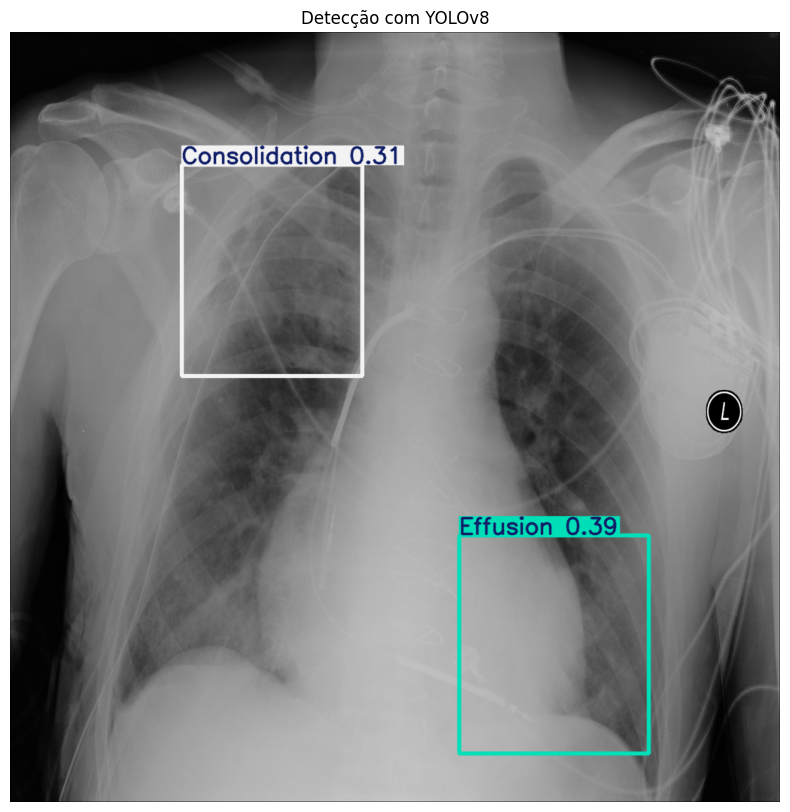

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Carrega o modelo treinado
model = YOLO('runs/detect/yolov8s_chest_improved/weights/best.pt')

# Caminho para a imagem de teste
img_path = 'chestx_det10_yolo/images/val/36212.png'  # substitui pelo caminho da tua imagem

# Inferência
results = model(img_path)

# Mostra imagem com bounding boxes diretamente no notebook
result_img = results[0].plot()  # desenha as boxes na imagem

# Conversão BGR para RGB para exibir corretamente com matplotlib
result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Exibição
plt.figure(figsize=(10, 10))
plt.imshow(result_img_rgb)
plt.axis('off')
plt.title("Detecção com YOLOv8")
plt.show()


In [ ]:
!zip -r yolov8s_chest_model_improved_params.zip runs/detect/yolov8s_chest_improved2/
!cp yolov8s_chest_model_improved_params.zip /content/drive/MyDrive/ModelosYOLO/

  adding: runs/detect/yolov8s_chest_improved/ (stored 0%)
  adding: runs/detect/yolov8s_chest_improved/weights/ (stored 0%)
  adding: runs/detect/yolov8s_chest_improved/weights/last.pt (deflated 8%)
  adding: runs/detect/yolov8s_chest_improved/weights/best.pt (deflated 8%)
  adding: runs/detect/yolov8s_chest_improved/val_batch0_labels.jpg (deflated 12%)
  adding: runs/detect/yolov8s_chest_improved/train_batch0.jpg (deflated 7%)
  adding: runs/detect/yolov8s_chest_improved/BoxF1_curve.png (deflated 6%)
  adding: runs/detect/yolov8s_chest_improved/val_batch2_labels.jpg (deflated 14%)
  adding: runs/detect/yolov8s_chest_improved/results.csv (deflated 62%)
  adding: runs/detect/yolov8s_chest_improved/args.yaml (deflated 52%)
  adding: runs/detect/yolov8s_chest_improved/labels_correlogram.jpg (deflated 39%)
  adding: runs/detect/yolov8s_chest_improved/confusion_matrix_normalized.png (deflated 15%)
  adding: runs/detect/yolov8s_chest_improved/train_batch33841.jpg (deflated 13%)
  adding: run

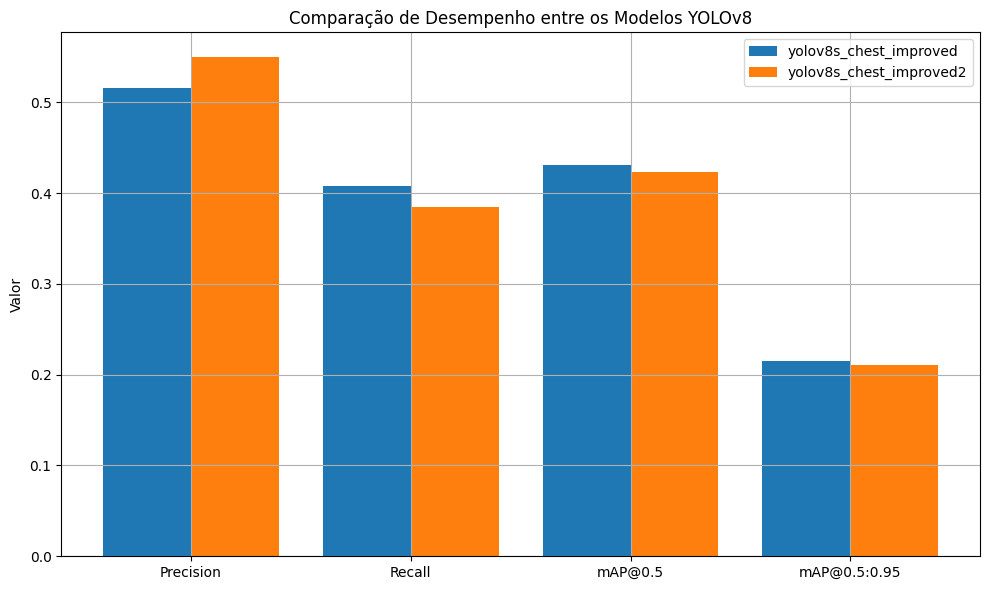

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminhos para os ficheiros de resultados dos dois modelos
path_model1 = 'runs/detect/yolov8s_chest_improved/results.csv'
path_model2 = 'runs/detect/yolov8s_chest_improved2/results.csv'

# Ler os ficheiros CSV
df1 = pd.read_csv(path_model1)
df2 = pd.read_csv(path_model2)

# Selecionar as últimas métricas de treino (última época)
last1 = df1.iloc[-1]
last2 = df2.iloc[-1]

# Métricas a comparar
metrics = [
    'metrics/precision(B)',
    'metrics/recall(B)',
    'metrics/mAP50(B)',
    'metrics/mAP50-95(B)'
]

# Obter valores para cada modelo
values1 = [last1[m] for m in metrics]
values2 = [last2[m] for m in metrics]

# Criar gráfico comparativo
x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], values1, width=0.4, label='yolov8s_chest_improved')
plt.bar([i + 0.2 for i in x], values2, width=0.4, label='yolov8s_chest_improved2')
plt.xticks(x, ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95'])
plt.ylabel('Valor')
plt.title('Comparação de Desempenho entre os Modelos YOLOv8')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Testing with pre- processing


In [ ]:
!cp /content/drive/MyDrive/apvc_yolo/chestx_det10_yolo_pp.zip .
!unzip -q chestx_det10_yolo_pp.zip

In [ ]:
!cp chestx_det10_yolo_pp/data.yaml .

In [ ]:
!cat data.yaml

path: chestx_det10_yolo_pp
train: images/train
val: images/val
nc: 10
names: ['Atelectasis', 'Calcification', 'Consolidation', 'Effusion', 'Emphysema', 'Fibrosis', 'Fracture', 'Mass', 'Nodule', 'Pneumothorax']


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')
model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    name='yolov8s_chest_improved_pp',
    patience=20,
    lr0=0.0005,
    warmup_epochs=3,
    weight_decay=0.0001,
    hsv_v=0.4,        # variação de brilho
    mixup=0.1         # opcional
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_chest_improved_pp, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=1

train: Scanning /content/chestx_det10_yolo_pp/labels/train... 3001 images, 681 backgrounds, 0 corrupt: 100%|██████████| 3001/3001 [00:10<00:00, 279.77it/s]

train: /content/chestx_det10_yolo_pp/images/train/57467.png: 1 duplicate labels removed
train: New cache created: /content/chestx_det10_yolo_pp/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2509.0±1578.7 MB/s, size: 548.0 KB)


val: Scanning /content/chestx_det10_yolo_pp/labels/val... 542 images, 83 backgrounds, 0 corrupt: 100%|██████████| 542/542 [00:02<00:00, 241.77it/s]

val: New cache created: /content/chestx_det10_yolo_pp/labels/val.cache


Plotting labels to runs/detect/yolov8s_chest_improved_pp/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0001), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8s_chest_improved_pp
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.73G      2.171      3.697      2.074          6        640: 100%|██████████| 376/376 [00:45<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.32it/s]


                   all        542       1476      0.552     0.0462     0.0335     0.0132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.98G      2.099      3.121      2.015          5        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.86it/s]


                   all        542       1476      0.438      0.127     0.0461     0.0169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.03G      2.109      3.087      1.999          0        640: 100%|██████████| 376/376 [00:40<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.98it/s]

                   all        542       1476      0.495      0.119     0.0612     0.0222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       5.1G      2.037      2.971      1.935          6        640: 100%|██████████| 376/376 [00:40<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.11it/s]

                   all        542       1476      0.419      0.185      0.108     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.17G      2.017      2.903      1.913          3        640: 100%|██████████| 376/376 [00:40<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.31it/s]

                   all        542       1476      0.412      0.174      0.114     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.23G      1.965       2.82      1.876          5        640: 100%|██████████| 376/376 [00:40<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.34it/s]

                   all        542       1476      0.406       0.19      0.122     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       5.3G      1.956       2.76      1.862          5        640: 100%|██████████| 376/376 [00:40<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.27it/s]

                   all        542       1476       0.53      0.111      0.103      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.37G      1.917      2.708      1.838          0        640: 100%|██████████| 376/376 [00:40<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.20it/s]


                   all        542       1476      0.427      0.198      0.139     0.0596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.43G      1.892      2.662      1.824          5        640: 100%|██████████| 376/376 [00:40<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.31it/s]

                   all        542       1476      0.348       0.21      0.149     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       5.5G      1.899      2.635      1.819          4        640: 100%|██████████| 376/376 [00:40<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.65it/s]


                   all        542       1476      0.411      0.216       0.17     0.0824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.57G      1.878      2.618      1.806          8        640: 100%|██████████| 376/376 [00:40<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.52it/s]

                   all        542       1476      0.385      0.235      0.193     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.88G      1.867      2.571      1.811          3        640: 100%|██████████| 376/376 [00:40<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.35it/s]

                   all        542       1476      0.311      0.222      0.184      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.94G       1.84      2.554      1.804          0        640: 100%|██████████| 376/376 [00:40<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.51it/s]


                   all        542       1476      0.375      0.231      0.191     0.0974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.25G      1.856      2.539      1.787          6        640: 100%|██████████| 376/376 [00:40<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.54it/s]

                   all        542       1476      0.349      0.238        0.2     0.0993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.32G      1.846      2.521      1.784          4        640: 100%|██████████| 376/376 [00:40<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.57it/s]


                   all        542       1476      0.344       0.26      0.208      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.39G      1.807      2.432      1.752          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.06it/s]


                   all        542       1476      0.246      0.242      0.188     0.0847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.45G      1.791      2.382       1.74          5        640: 100%|██████████| 376/376 [00:40<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.42it/s]


                   all        542       1476      0.385      0.256      0.206        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.93G      1.798      2.401      1.746         10        640: 100%|██████████| 376/376 [00:40<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.69it/s]


                   all        542       1476      0.326      0.266      0.217      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.99G      1.779      2.391      1.748          4        640: 100%|██████████| 376/376 [00:40<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.46it/s]


                   all        542       1476      0.312      0.267      0.229      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.06G      1.764      2.332      1.747          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.05it/s]


                   all        542       1476      0.394      0.308      0.252      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.13G      1.748      2.325      1.719          5        640: 100%|██████████| 376/376 [00:40<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.11it/s]


                   all        542       1476      0.279      0.281      0.221      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       7.6G      1.738      2.291      1.711          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.28it/s]

                   all        542       1476      0.335      0.346      0.256      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.67G      1.761       2.28      1.728          5        640: 100%|██████████| 376/376 [00:40<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.75it/s]


                   all        542       1476      0.347      0.303      0.249      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.73G      1.745      2.263      1.711          6        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.63it/s]


                   all        542       1476      0.372      0.313      0.273      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       7.8G      1.719      2.237      1.695          4        640: 100%|██████████| 376/376 [00:40<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.44it/s]


                   all        542       1476      0.356      0.313       0.25      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.11G      1.709      2.223      1.697          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.71it/s]

                   all        542       1476      0.406      0.297      0.265      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.18G      1.714      2.216      1.692          4        640: 100%|██████████| 376/376 [00:40<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.33it/s]

                   all        542       1476      0.357      0.306      0.267      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.24G      1.704      2.196      1.691          0        640: 100%|██████████| 376/376 [00:41<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.03it/s]

                   all        542       1476      0.383      0.328       0.29       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.55G      1.702      2.137      1.686          4        640: 100%|██████████| 376/376 [00:41<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.37it/s]

                   all        542       1476      0.378      0.323      0.294      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.62G      1.686      2.142      1.675         10        640: 100%|██████████| 376/376 [00:40<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.91it/s]

                   all        542       1476      0.413      0.327       0.29      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.69G      1.692      2.129      1.669          2        640: 100%|██████████| 376/376 [00:41<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.36it/s]


                   all        542       1476      0.388      0.342      0.304       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.76G      1.673      2.121       1.66          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.27it/s]


                   all        542       1476      0.383      0.318      0.279      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.23G      1.653      2.111      1.655          8        640: 100%|██████████| 376/376 [00:40<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.33it/s]


                   all        542       1476      0.383      0.358      0.309       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.29G      1.671      2.071      1.666          1        640: 100%|██████████| 376/376 [00:41<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.66it/s]

                   all        542       1476       0.42      0.311      0.319      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.36G      1.654      2.081      1.653          1        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.52it/s]

                   all        542       1476      0.386      0.325        0.3      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.43G      1.653      2.035      1.656         10        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.55it/s]


                   all        542       1476      0.421       0.33      0.311      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       9.5G      1.634      2.033      1.638          3        640: 100%|██████████| 376/376 [00:40<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.63it/s]

                   all        542       1476      0.424      0.345      0.323      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.81G      1.617      1.974       1.62          9        640: 100%|██████████| 376/376 [00:40<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.40it/s]


                   all        542       1476      0.399      0.347      0.327      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.87G      1.613       1.97      1.619         11        640: 100%|██████████| 376/376 [00:41<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.62it/s]


                   all        542       1476      0.417      0.324      0.323      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.94G        1.6      1.946      1.611          1        640: 100%|██████████| 376/376 [00:41<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.99it/s]


                   all        542       1476      0.388      0.337      0.313      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.2G      1.595      1.948      1.609          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.43it/s]

                   all        542       1476      0.391      0.352      0.324      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.3G      1.593      1.938      1.607          1        640: 100%|██████████| 376/376 [00:41<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.20it/s]

                   all        542       1476      0.399       0.35      0.338      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.4G      1.599      1.929      1.608          1        640: 100%|██████████| 376/376 [00:40<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.62it/s]


                   all        542       1476      0.431      0.324      0.321      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.5G      1.566      1.877      1.584          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.34it/s]


                   all        542       1476      0.403      0.342      0.331      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.8G       1.56      1.871      1.588          5        640: 100%|██████████| 376/376 [00:40<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.91it/s]


                   all        542       1476      0.438      0.355      0.353      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.8G      1.569      1.865      1.586          6        640: 100%|██████████| 376/376 [00:40<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.60it/s]


                   all        542       1476      0.462      0.358      0.347      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.3G      1.543      1.839      1.579          4        640: 100%|██████████| 376/376 [00:41<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.44it/s]


                   all        542       1476      0.429      0.359      0.344      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.4G      1.544      1.832      1.582          5        640: 100%|██████████| 376/376 [00:40<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.84it/s]

                   all        542       1476      0.456      0.331      0.339      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.4G      1.544      1.808      1.571          5        640: 100%|██████████| 376/376 [00:40<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.18it/s]

                   all        542       1476      0.454      0.336      0.343      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.5G      1.522      1.793      1.557          3        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.65it/s]

                   all        542       1476      0.385      0.371      0.327      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.6G      1.526      1.802      1.561         12        640: 100%|██████████| 376/376 [00:41<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.54it/s]


                   all        542       1476      0.427      0.353      0.353      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        12G      1.504      1.727      1.556          1        640: 100%|██████████| 376/376 [00:40<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.37it/s]

                   all        542       1476      0.454      0.373      0.355      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.1G      1.506      1.728       1.55          2        640: 100%|██████████| 376/376 [00:41<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.69it/s]


                   all        542       1476      0.458       0.33      0.346      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.2G      1.499      1.695      1.534         12        640: 100%|██████████| 376/376 [00:40<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.36it/s]


                   all        542       1476      0.471      0.343      0.363      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.2G      1.482      1.706      1.537          4        640: 100%|██████████| 376/376 [00:40<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.09it/s]

                   all        542       1476      0.474      0.345      0.354      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.6G      1.476      1.684      1.533          4        640: 100%|██████████| 376/376 [00:40<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.53it/s]

                   all        542       1476       0.51       0.36      0.374      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.6G      1.465      1.676      1.525          0        640: 100%|██████████| 376/376 [00:41<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.39it/s]


                   all        542       1476      0.467      0.342      0.359      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.9G      1.468       1.65      1.522          3        640: 100%|██████████| 376/376 [00:41<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.67it/s]


                   all        542       1476      0.425      0.368      0.355      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        13G      1.465      1.648      1.525          8        640: 100%|██████████| 376/376 [00:41<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.72it/s]


                   all        542       1476      0.584      0.322       0.37      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.1G      1.453      1.646      1.516          3        640: 100%|██████████| 376/376 [00:41<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.48it/s]


                   all        542       1476      0.445      0.386      0.381      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.1G      1.457       1.65       1.52          4        640: 100%|██████████| 376/376 [00:40<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.26it/s]

                   all        542       1476      0.546      0.343      0.383      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.2G      1.426      1.599      1.503          6        640: 100%|██████████| 376/376 [00:40<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.26it/s]

                   all        542       1476      0.451       0.38      0.382      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.7G      1.411      1.559      1.493          8        640: 100%|██████████| 376/376 [00:41<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.47it/s]

                   all        542       1476      0.495      0.343      0.376      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.7G      1.397       1.52      1.485          3        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.48it/s]

                   all        542       1476      0.496      0.347      0.369       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.8G      1.398      1.542       1.48          3        640: 100%|██████████| 376/376 [00:40<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.01it/s]

                   all        542       1476      0.529      0.323      0.363      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.9G      1.392      1.517      1.475          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.55it/s]


                   all        542       1476      0.497      0.381       0.39      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.9G      1.403      1.532      1.482          4        640: 100%|██████████| 376/376 [00:41<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.46it/s]

                   all        542       1476      0.448      0.407      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      14.4G      1.372      1.495      1.471          5        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.68it/s]

                   all        542       1476       0.47      0.391      0.383      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.5G      1.373      1.463      1.456         12        640: 100%|██████████| 376/376 [00:41<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.50it/s]

                   all        542       1476      0.459      0.387      0.389      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.5G      1.369      1.473      1.468          4        640: 100%|██████████| 376/376 [00:41<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.57it/s]

                   all        542       1476      0.497       0.37      0.387      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.6G      1.361      1.456       1.45          1        640: 100%|██████████| 376/376 [00:41<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.82it/s]


                   all        542       1476      0.437      0.403      0.387      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      14.7G       1.36      1.444      1.453          4        640: 100%|██████████| 376/376 [00:40<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.50it/s]

                   all        542       1476      0.479      0.388      0.386      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      15.2G      1.328      1.417      1.438         10        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.69it/s]

                   all        542       1476      0.497      0.356      0.377      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      15.2G      1.321      1.402      1.428          4        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.37it/s]

                   all        542       1476      0.495      0.377       0.38      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      15.3G      1.317      1.395       1.43          3        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.36it/s]

                   all        542       1476       0.48      0.374      0.378       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      15.4G      1.312      1.373      1.433          2        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.52it/s]


                   all        542       1476      0.452      0.392      0.383      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      15.8G      1.313      1.371      1.421          5        640: 100%|██████████| 376/376 [00:41<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.92it/s]

                   all        542       1476      0.519       0.34      0.384      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      15.9G      1.302      1.359      1.414         17        640: 100%|██████████| 376/376 [00:40<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.83it/s]

                   all        542       1476      0.468      0.389      0.377      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        16G      1.291      1.347      1.408          4        640: 100%|██████████| 376/376 [00:41<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.81it/s]

                   all        542       1476      0.482      0.372      0.387      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        16G       1.26      1.317      1.384          8        640: 100%|██████████| 376/376 [00:41<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  8.99it/s]


                   all        542       1476        0.5      0.377      0.391      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      16.3G      1.264      1.329        1.4          2        640: 100%|██████████| 376/376 [00:41<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.62it/s]

                   all        542       1476      0.573      0.358      0.403      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      16.4G      1.273        1.3      1.395          2        640: 100%|██████████| 376/376 [00:41<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.53it/s]

                   all        542       1476      0.503      0.374      0.393      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      16.5G      1.265      1.305      1.392          2        640: 100%|██████████| 376/376 [00:41<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.79it/s]

                   all        542       1476      0.484      0.368      0.386      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      16.5G      1.249      1.288      1.376          4        640: 100%|██████████| 376/376 [00:41<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.91it/s]


                   all        542       1476      0.505      0.376        0.4      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      16.8G      1.251      1.286      1.382          9        640: 100%|██████████| 376/376 [00:41<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.23it/s]

                   all        542       1476      0.489      0.389        0.4      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      16.9G      1.239      1.257      1.371          4        640: 100%|██████████| 376/376 [00:41<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.46it/s]

                   all        542       1476       0.49      0.397      0.402      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        17G      1.225      1.231      1.362          1        640: 100%|██████████| 376/376 [00:41<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.57it/s]

                   all        542       1476      0.513      0.368        0.4      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      17.5G      1.196      1.205      1.341         10        640: 100%|██████████| 376/376 [00:41<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.79it/s]


                   all        542       1476      0.496       0.39      0.395      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      17.5G      1.216      1.219      1.353          5        640: 100%|██████████| 376/376 [00:41<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.81it/s]

                   all        542       1476      0.474      0.394      0.399      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      17.6G      1.173      1.178       1.32          4        640: 100%|██████████| 376/376 [00:41<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.54it/s]

                   all        542       1476       0.47      0.411      0.401      0.195


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      17.7G      1.096     0.9355       1.31          1        640: 100%|██████████| 376/376 [00:41<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.44it/s]

                   all        542       1476      0.569      0.362      0.411      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      17.7G      1.062     0.8847      1.281          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.37it/s]

                   all        542       1476      0.529      0.381      0.406      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        18G      1.058     0.8569      1.287          1        640: 100%|██████████| 376/376 [00:40<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.58it/s]

                   all        542       1476      0.455      0.416      0.407      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      18.1G      1.026     0.8548      1.265          0        640: 100%|██████████| 376/376 [00:40<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.71it/s]

                   all        542       1476      0.503       0.41       0.41      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      18.2G      1.008     0.8174      1.246          0        640: 100%|██████████| 376/376 [00:40<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.55it/s]

                   all        542       1476      0.504      0.404      0.414      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      18.2G      1.018     0.8223      1.259          1        640: 100%|██████████| 376/376 [00:40<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.55it/s]

                   all        542       1476      0.488        0.4      0.409      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      18.7G     0.9934     0.7834      1.234          0        640: 100%|██████████| 376/376 [00:40<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.56it/s]


                   all        542       1476      0.475      0.416      0.412        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      18.8G     0.9953      0.789      1.229          1        640: 100%|██████████| 376/376 [00:40<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.62it/s]

                   all        542       1476      0.503      0.408      0.412      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      18.8G     0.9924     0.8007      1.241          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.70it/s]


                   all        542       1476       0.51      0.385      0.409      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      18.9G     0.9743     0.7794      1.231          2        640: 100%|██████████| 376/376 [00:40<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.01it/s]


                   all        542       1476      0.486      0.395      0.411      0.202

100 epochs completed in 1.263 hours.
Optimizer stripped from runs/detect/yolov8s_chest_improved_pp/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8s_chest_improved_pp/weights/best.pt, 52.0MB

Validating runs/detect/yolov8s_chest_improved_pp/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:04<00:00,  8.36it/s]


                   all        542       1476      0.503      0.405      0.414      0.205
           Atelectasis         48         51      0.284      0.314      0.271     0.0928
         Calcification         38         67      0.497      0.388      0.392      0.127
         Consolidation        289        446      0.549       0.59      0.574      0.272
              Effusion        252        372      0.469      0.532      0.488      0.209
             Emphysema         39         66       0.77      0.658      0.767      0.585
              Fibrosis         82        120      0.482      0.442      0.416      0.201
              Fracture         76        115      0.642      0.278      0.329      0.112
                  Mass         30         31      0.539      0.355      0.338      0.177
                Nodule         77        166      0.456      0.235      0.268      0.118
          Pneumothorax         35         42      0.339      0.262      0.296      0.152
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788e73ef2390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0


image 1/1 /content/chestx_det10_yolo_pp/images/val/36212.png: 640x640 1 Consolidation, 2 Effusions, 10.0ms
Speed: 3.5ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


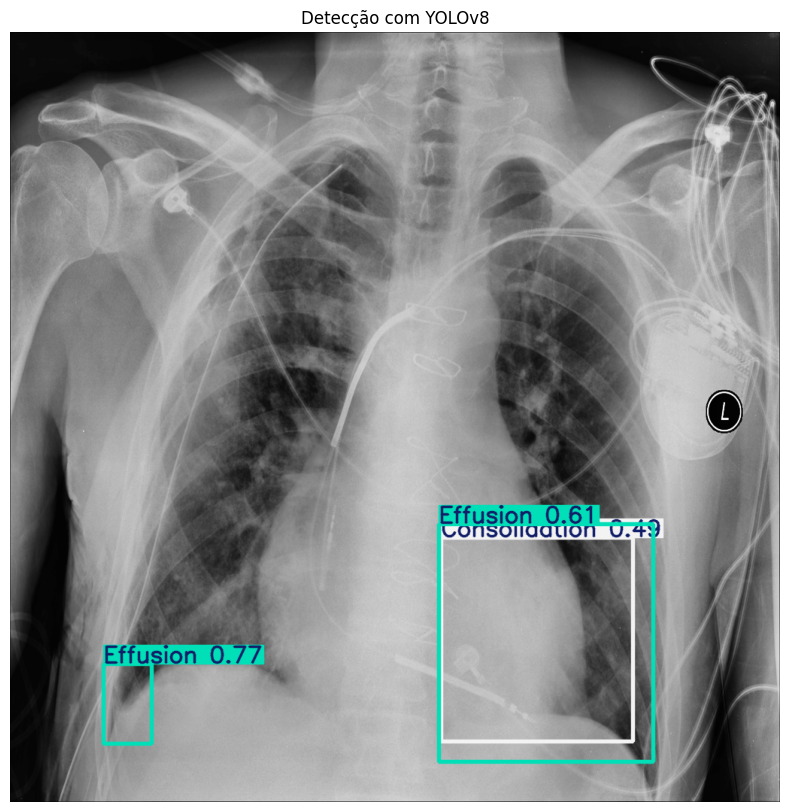

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Carrega o modelo treinado
model = YOLO('runs/detect/yolov8s_chest_improved_pp/weights/best.pt')

# Caminho para a imagem de teste
img_path = 'chestx_det10_yolo_pp/images/val/36212.png'  # substitui pelo caminho da tua imagem

# Inferência
results = model(img_path)

# Mostra imagem com bounding boxes diretamente no notebook
result_img = results[0].plot()  # desenha as boxes na imagem

# Conversão BGR para RGB para exibir corretamente com matplotlib
result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Exibição
plt.figure(figsize=(10, 10))
plt.imshow(result_img_rgb)
plt.axis('off')
plt.title("Detecção com YOLOv8")
plt.show()


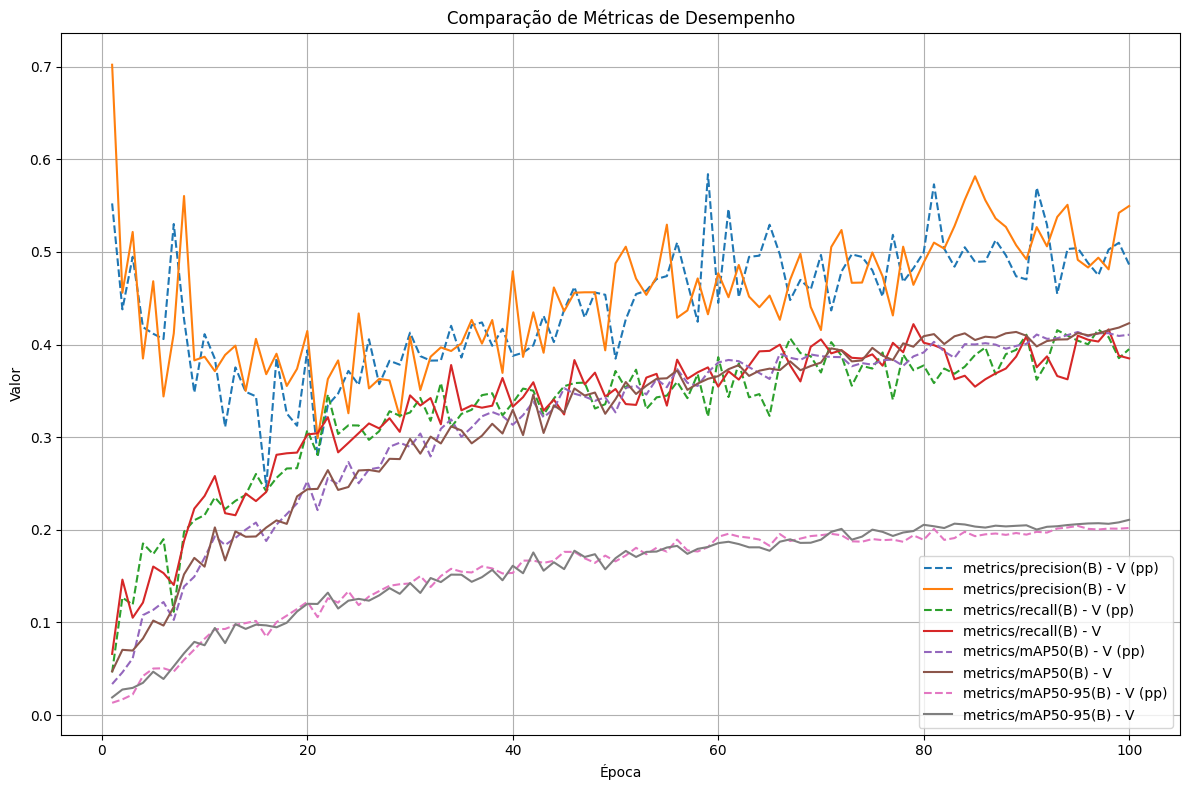

Comparação de Métricas Máximas:

                       V (pp)        V Melhor
metrics/precision(B)  0.58399  0.70211      V
metrics/recall(B)     0.41624  0.42205      V
metrics/mAP50(B)      0.41358  0.42306      V
metrics/mAP50-95(B)   0.20425  0.21081      V


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os ficheiros CSV
df_pp = pd.read_csv('/content/runs/detect/yolov8s_chest_improved_pp/results.csv')   # Versão 1
df_v = pd.read_csv('/content/runs/detect/yolov8s_chest_improved2/results.csv')   # Versão 2

# Comparar métricas ao longo das épocas
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

plt.figure(figsize=(12, 8))
for metric in metrics:
    plt.plot(df_pp['epoch'], df_pp[metric], label=f'{metric} - V (pp)', linestyle='--')
    plt.plot(df_v['epoch'], df_v[metric], label=f'{metric} - V', linestyle='-')

plt.title("Comparação de Métricas de Desempenho")
plt.xlabel("Época")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparar os valores máximos de cada métrica
max_metrics_pp = df_pp[metrics].max()
max_metrics_v2 = df_v[metrics].max()

comparison_df = pd.DataFrame({
    'V (pp)': max_metrics_pp,
    'V': max_metrics_v2
})
comparison_df['Melhor'] = comparison_df.idxmax(axis=1)

# Mostrar a tabela comparativa
print("Comparação de Métricas Máximas:\n")
print(comparison_df)


Modelo original v2 ganha

In [ ]:
#Voltar para o data set original
!cp chestx_det10_yolo/data.yaml .

In [ ]:
!cat data.yaml

path: chestx_det10_yolo
train: images/train
val: images/val
nc: 10
names: ['Atelectasis', 'Calcification', 'Consolidation', 'Effusion', 'Emphysema', 'Fibrosis', 'Fracture', 'Mass', 'Nodule', 'Pneumothorax']


In [ ]:
model.train(
    data='data.yaml',
    epochs=200,
    imgsz=640,
    batch=16,
    name='yolov8s_chest_final_teste',
    patience=30,
    lr0=0.0003,
    warmup_epochs=5,
    weight_decay=0.0001,
    degrees=5,
    translate=0.05,
    scale=0.05,
    shear=2,
    mosaic=0.1,
    flipud=0.0,
    fliplr=0.5,
    mixup=0.0,
    hsv_v=0.0,        # remover variação de brilho
    optimizer='AdamW',
)


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=5, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.0, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0003, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/yolov8s_chest_improved_pp/weights/best.pt, momentum=0.937, mosaic=0.1, multi_scale=False, name=yolov8s_chest_final_teste, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patie

train: Scanning /content/chestx_det10_yolo/labels/train.cache... 3001 images, 681 backgrounds, 0 corrupt: 100%|██████████| 3001/3001 [00:00<?, ?it/s]

train: /content/chestx_det10_yolo/images/train/57467.png: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1511.8±1182.0 MB/s, size: 404.5 KB)


val: Scanning /content/chestx_det10_yolo/labels/val.cache... 542 images, 83 backgrounds, 0 corrupt: 100%|██████████| 542/542 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8s_chest_final_teste/labels.jpg... 
optimizer: AdamW(lr=0.0003, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0001), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8s_chest_final_teste
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      10.2G       1.71      1.947      1.837         15        640: 100%|██████████| 188/188 [00:33<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.72it/s]

                   all        542       1476      0.445      0.269       0.27      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      11.3G      1.414       1.33      1.569         15        640: 100%|██████████| 188/188 [00:31<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.05it/s]

                   all        542       1476      0.456      0.336      0.334      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      11.3G      1.316      1.142      1.492         13        640: 100%|██████████| 188/188 [00:30<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.83it/s]

                   all        542       1476       0.47      0.343      0.347      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      11.3G      1.266      1.053      1.455         19        640: 100%|██████████| 188/188 [00:29<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.97it/s]

                   all        542       1476      0.429       0.38      0.353      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      11.3G      1.208     0.9884      1.402         41        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.13it/s]

                   all        542       1476      0.488      0.377      0.371      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      11.3G      1.177     0.9322       1.39         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.09it/s]

                   all        542       1476      0.455      0.408      0.386      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      11.3G      1.143     0.8893      1.359         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]

                   all        542       1476      0.448      0.408       0.39      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      11.3G      1.138     0.8782      1.351         19        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.13it/s]

                   all        542       1476      0.459      0.403      0.386      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      11.3G      1.104     0.8568      1.319         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.06it/s]

                   all        542       1476      0.449      0.395      0.363      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      11.3G      1.088     0.8155      1.311         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.73it/s]

                   all        542       1476       0.53       0.34      0.379      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      11.3G      1.069     0.7825      1.301         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.06it/s]

                   all        542       1476      0.507      0.377      0.381      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      11.3G       1.04     0.7633      1.275         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]

                   all        542       1476      0.477      0.401      0.396      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      11.3G      1.027     0.7396      1.263         27        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.80it/s]

                   all        542       1476      0.507      0.377      0.384      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      11.3G      1.022     0.7219       1.26         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.67it/s]

                   all        542       1476      0.457      0.386      0.379      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      11.3G      1.003     0.7054      1.243         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        542       1476      0.507       0.39      0.385       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      11.3G     0.9909      0.702      1.229         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]

                   all        542       1476      0.462       0.42      0.391      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      11.3G     0.9773      0.679      1.219         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.02it/s]

                   all        542       1476      0.469      0.386      0.384      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      11.3G     0.9716     0.6678      1.219         38        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.86it/s]

                   all        542       1476      0.484      0.369      0.376      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      11.3G     0.9521     0.6593      1.202          9        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        542       1476      0.455      0.389      0.372      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      11.3G     0.9403     0.6279      1.193         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.05it/s]

                   all        542       1476      0.481      0.366      0.368       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      11.3G     0.9284     0.6185      1.187         29        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.88it/s]

                   all        542       1476       0.48      0.402      0.394      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      11.3G      0.919     0.6158      1.179         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]

                   all        542       1476      0.474      0.386      0.383      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      11.3G     0.8961     0.5868      1.153         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.86it/s]

                   all        542       1476      0.549      0.351      0.384      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      11.3G     0.8837     0.5781       1.15         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.11it/s]

                   all        542       1476      0.555      0.386      0.397      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      11.3G     0.8773     0.5684      1.147         19        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        542       1476      0.477      0.394      0.383      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      11.3G     0.8798     0.5704      1.148         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.09it/s]

                   all        542       1476      0.557      0.341      0.384      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      11.3G     0.8762     0.5765      1.139         23        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.77it/s]

                   all        542       1476      0.512      0.394      0.412      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      11.3G     0.8641     0.5622      1.132         29        640: 100%|██████████| 188/188 [00:28<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        542       1476      0.518      0.412      0.414      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      11.3G     0.8469     0.5354      1.119         25        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        542       1476       0.51       0.42      0.411      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      11.3G     0.8506     0.5481      1.124         15        640: 100%|██████████| 188/188 [00:29<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]

                   all        542       1476      0.592      0.394       0.42      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      11.3G      0.833       0.54       1.11         41        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        542       1476      0.496      0.388      0.403      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      11.3G      0.826     0.5276      1.109         29        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]

                   all        542       1476      0.474      0.399      0.384      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      11.3G     0.8071     0.5234      1.092         14        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.81it/s]

                   all        542       1476      0.553      0.371      0.401      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      11.3G     0.8062     0.5048      1.093         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.81it/s]

                   all        542       1476      0.526      0.391      0.396      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      11.3G     0.8104     0.5155       1.09         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        542       1476      0.515      0.375       0.39      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      11.3G     0.8036     0.5081      1.094         14        640: 100%|██████████| 188/188 [00:29<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.13it/s]

                   all        542       1476      0.521      0.377      0.398      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      11.3G     0.7886     0.4975      1.083         15        640: 100%|██████████| 188/188 [00:29<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.88it/s]

                   all        542       1476      0.565      0.359      0.401      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      11.3G     0.7942     0.4978      1.081         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.83it/s]

                   all        542       1476      0.493      0.364      0.378      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      11.3G     0.7789     0.4888      1.072         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        542       1476      0.582      0.347      0.394      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      11.3G     0.7804      0.486      1.073         32        640: 100%|██████████| 188/188 [00:29<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]

                   all        542       1476      0.539      0.374       0.39      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      11.3G     0.7704     0.4802      1.068         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        542       1476      0.525      0.367      0.389      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      11.3G     0.7624     0.4785      1.064         19        640: 100%|██████████| 188/188 [00:29<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.85it/s]

                   all        542       1476       0.54      0.373      0.399      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      11.3G     0.7603     0.4695      1.058         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.09it/s]

                   all        542       1476      0.548      0.361      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      11.3G     0.7588     0.4721      1.056         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        542       1476      0.509      0.378      0.395      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      11.3G     0.7456     0.4697      1.051         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        542       1476      0.553      0.372      0.392      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      11.3G     0.7468     0.4705      1.045         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.09it/s]

                   all        542       1476       0.51      0.377      0.392      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      11.3G     0.7289     0.4476      1.042         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.90it/s]

                   all        542       1476      0.533      0.385      0.401      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      11.3G     0.7407     0.4539      1.041         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.95it/s]

                   all        542       1476       0.55      0.394       0.41      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      11.3G     0.7259     0.4536      1.037         10        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        542       1476      0.597      0.393      0.413      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      11.3G     0.7162     0.4359      1.029         27        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.81it/s]

                   all        542       1476       0.56      0.404      0.412      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      11.3G      0.719     0.4501      1.033         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        542       1476      0.508      0.402      0.407      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      11.3G     0.7128     0.4372      1.025         19        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.88it/s]

                   all        542       1476      0.504      0.416      0.412      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      11.3G     0.7047     0.4422      1.023         33        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.01it/s]


                   all        542       1476      0.606      0.351      0.401       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      11.3G     0.6995      0.437      1.018         26        640: 100%|██████████| 188/188 [00:29<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]

                   all        542       1476      0.542      0.367      0.401      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      11.3G     0.6916     0.4256      1.013         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.89it/s]

                   all        542       1476      0.531      0.379      0.399      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      11.3G     0.6931     0.4296      1.024         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.04it/s]

                   all        542       1476      0.499       0.39      0.412      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      11.3G     0.6895     0.4194      1.011         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        542       1476      0.526       0.39      0.404      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      11.3G     0.6801     0.4091      1.007         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.94it/s]

                   all        542       1476      0.543      0.353      0.391      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      11.3G     0.6781     0.4258      1.009         32        640: 100%|██████████| 188/188 [00:29<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.76it/s]

                   all        542       1476       0.53      0.392      0.418      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      11.3G     0.6729     0.4179          1         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.29it/s]

                   all        542       1476      0.551      0.397       0.42      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      11.3G     0.6731     0.4084     0.9967         28        640: 100%|██████████| 188/188 [00:29<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        542       1476      0.597      0.359      0.405      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      11.3G     0.6645     0.4146     0.9941         27        640: 100%|██████████| 188/188 [00:29<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        542       1476      0.576      0.375      0.407      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      11.3G     0.6566     0.4074     0.9922         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        542       1476      0.578      0.365      0.409      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      11.3G      0.646     0.3988     0.9879         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476      0.545      0.382      0.405      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      11.3G     0.6477     0.3966     0.9885         63        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.97it/s]

                   all        542       1476      0.562      0.382      0.418      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      11.3G     0.6485     0.4013     0.9874         25        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        542       1476      0.602      0.386      0.416      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      11.3G     0.6376     0.4009     0.9875         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.95it/s]

                   all        542       1476      0.576      0.386      0.428      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      11.3G     0.6342     0.3926     0.9823         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        542       1476      0.522      0.369      0.402      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      11.3G     0.6246     0.3919     0.9747         26        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.11it/s]

                   all        542       1476      0.554      0.378      0.418      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      11.3G     0.6296     0.3865     0.9772         25        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        542       1476      0.523      0.391      0.404      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      11.3G      0.625     0.3839     0.9712         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        542       1476      0.584      0.365      0.403      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      11.3G     0.6151      0.375     0.9706         13        640: 100%|██████████| 188/188 [00:29<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        542       1476       0.61      0.365      0.409      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      11.3G     0.6122     0.3802      0.967         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.01it/s]

                   all        542       1476      0.571      0.387       0.42      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      11.3G     0.6109     0.3705     0.9671         32        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.84it/s]

                   all        542       1476      0.572      0.387      0.422      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      11.3G     0.6026     0.3722     0.9621          8        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        542       1476      0.585      0.368      0.416      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      11.3G     0.6096     0.3691     0.9618         29        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        542       1476      0.563      0.363      0.407      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      11.3G     0.6032     0.3741     0.9599         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        542       1476      0.541      0.381      0.405      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      11.3G     0.5928     0.3698     0.9574         41        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.03it/s]

                   all        542       1476      0.552      0.377      0.406      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      11.3G     0.5943     0.3666     0.9609         26        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]

                   all        542       1476      0.611      0.355      0.407      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      11.3G       0.59     0.3601      0.956         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.96it/s]

                   all        542       1476      0.584      0.348      0.403      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      11.3G     0.5892     0.3622     0.9591         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.07it/s]

                   all        542       1476      0.592      0.376      0.415      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      11.3G     0.5866     0.3687     0.9536         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        542       1476      0.567      0.365      0.408        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      11.3G     0.5748     0.3555      0.945         14        640: 100%|██████████| 188/188 [00:29<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476       0.57      0.389      0.421      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      11.3G     0.5842     0.3679     0.9528         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.90it/s]

                   all        542       1476      0.557      0.386      0.417      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      11.3G     0.5761     0.3538     0.9489         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        542       1476      0.619      0.366      0.413      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      11.3G      0.579      0.355     0.9498         25        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.03it/s]

                   all        542       1476      0.566      0.367      0.416      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      11.3G     0.5762     0.3632     0.9492         28        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        542       1476       0.57      0.376      0.413      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      11.3G     0.5656     0.3553     0.9444         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.88it/s]

                   all        542       1476      0.589      0.349      0.402      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      11.3G     0.5728       0.36     0.9491         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.34it/s]

                   all        542       1476      0.557      0.378      0.417       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      11.3G     0.5643     0.3503     0.9388         28        640: 100%|██████████| 188/188 [00:29<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.86it/s]

                   all        542       1476      0.644      0.359      0.425      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      11.3G     0.5588     0.3514     0.9402         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        542       1476       0.59      0.361      0.421      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      11.3G     0.5513     0.3459     0.9377         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476      0.601      0.374      0.423      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      11.3G     0.5541     0.3469     0.9334         23        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.97it/s]

                   all        542       1476      0.604      0.381      0.423       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      11.3G      0.545     0.3399     0.9352         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        542       1476      0.554      0.376      0.421      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      11.3G     0.5409      0.338     0.9288         29        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.93it/s]

                   all        542       1476      0.564      0.358      0.416      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      11.3G     0.5406     0.3333     0.9267         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.29it/s]

                   all        542       1476      0.589      0.362      0.421      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      11.3G      0.539     0.3336     0.9256         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.95it/s]

                   all        542       1476      0.582      0.371      0.421       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      11.3G     0.5349     0.3359     0.9258         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        542       1476      0.596       0.36       0.42      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      11.3G      0.539     0.3314     0.9269         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]


                   all        542       1476      0.561      0.375      0.435      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      11.3G     0.5339     0.3335     0.9262         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        542       1476      0.569      0.378      0.432      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      11.3G     0.5285     0.3222     0.9247         25        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.32it/s]

                   all        542       1476      0.582      0.374      0.425      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      11.3G     0.5324     0.3311     0.9243         29        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        542       1476      0.582      0.372      0.428      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      11.3G       0.53     0.3332     0.9251         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.94it/s]

                   all        542       1476      0.582      0.377      0.433      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      11.3G     0.5322     0.3319     0.9303         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        542       1476      0.547       0.39      0.426      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      11.3G     0.5169      0.327     0.9196         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        542       1476      0.587      0.378      0.437      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      11.3G     0.5138     0.3173     0.9149         32        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.97it/s]

                   all        542       1476      0.572      0.384      0.443      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      11.3G     0.5104     0.3181     0.9126         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        542       1476      0.565      0.372      0.433      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      11.3G      0.512     0.3167      0.915         14        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.01it/s]

                   all        542       1476      0.567      0.375      0.427      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      11.3G     0.5119     0.3247     0.9165         14        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        542       1476       0.55      0.373      0.431      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      11.3G     0.5136     0.3211     0.9174         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.87it/s]

                   all        542       1476      0.552      0.379      0.433      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      11.3G     0.5071     0.3272     0.9143         23        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476       0.65      0.326       0.42      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      11.3G     0.5032      0.316     0.9104         14        640: 100%|██████████| 188/188 [00:29<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.33it/s]

                   all        542       1476      0.587      0.356      0.429      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      11.3G     0.4995     0.3145     0.9111         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.94it/s]

                   all        542       1476       0.56      0.366       0.43      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      11.3G     0.5001     0.3101     0.9098         19        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        542       1476      0.574      0.369      0.426      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      11.3G     0.4946     0.3074     0.9064         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.02it/s]

                   all        542       1476      0.552      0.363      0.435      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      11.3G     0.4874     0.3099      0.903         27        640: 100%|██████████| 188/188 [00:29<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

                   all        542       1476      0.573      0.374      0.436      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      11.3G     0.4885     0.3038     0.9038         13        640: 100%|██████████| 188/188 [00:29<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.91it/s]

                   all        542       1476      0.577      0.379      0.438      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      11.3G     0.4938     0.3087     0.9036         42        640: 100%|██████████| 188/188 [00:29<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        542       1476      0.577      0.374      0.433      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      11.3G     0.4909     0.3155     0.9041         27        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

                   all        542       1476      0.585      0.374      0.427      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      11.3G     0.4866     0.3074     0.9047         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        542       1476      0.556      0.383      0.424      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      11.3G     0.4882     0.3035     0.9024         25        640: 100%|██████████| 188/188 [00:28<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.05it/s]

                   all        542       1476      0.582      0.365      0.435      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      11.3G     0.4861     0.3003     0.9027         19        640: 100%|██████████| 188/188 [00:29<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]


                   all        542       1476      0.622      0.363      0.434      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      11.3G     0.4761     0.2956     0.8964         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.10it/s]

                   all        542       1476       0.56      0.371      0.428      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      11.3G     0.4664     0.2901      0.891         28        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.34it/s]

                   all        542       1476      0.569      0.384      0.433      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      11.3G     0.4655     0.2893     0.8896         25        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.34it/s]

                   all        542       1476      0.567      0.376       0.43      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      11.3G     0.4795     0.2988     0.8996         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.87it/s]

                   all        542       1476       0.58      0.367      0.429      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      11.3G     0.4775      0.307     0.9033         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        542       1476      0.564      0.375      0.427      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      11.3G     0.4709     0.3041     0.8998         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]

                   all        542       1476      0.583      0.378      0.436      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      11.3G      0.462      0.291     0.8912         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.10it/s]

                   all        542       1476        0.6      0.368      0.436      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      11.3G     0.4637     0.2908     0.8895         15        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.03it/s]

                   all        542       1476      0.541      0.379      0.436      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      11.3G     0.4713     0.2971     0.8951         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.37it/s]

                   all        542       1476      0.589      0.365      0.435      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      11.3G     0.4586     0.2909     0.8885         28        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.90it/s]

                   all        542       1476      0.642      0.349      0.432      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      11.3G     0.4634     0.2981     0.8901         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        542       1476      0.592      0.364       0.43      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      11.3G     0.4569     0.2897     0.8867         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.03it/s]

                   all        542       1476      0.578      0.359      0.424      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      11.3G     0.4587     0.2947     0.8922         15        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.24it/s]

                   all        542       1476      0.557      0.371      0.427      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      11.3G      0.455     0.2921      0.886         25        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.95it/s]

                   all        542       1476      0.588       0.36      0.427      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      11.3G     0.4558     0.2894     0.8847         26        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        542       1476       0.62      0.368      0.431      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      11.3G     0.4508     0.2895     0.8866         25        640: 100%|██████████| 188/188 [00:28<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

                   all        542       1476      0.589      0.362      0.431      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      11.3G     0.4541     0.2889     0.8891         10        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        542       1476      0.579      0.366      0.433       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      11.3G     0.4505     0.2907     0.8883         23        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        542       1476      0.576      0.363      0.426      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      11.3G     0.4426     0.2833     0.8849         27        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.00it/s]

                   all        542       1476      0.599      0.376      0.439      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      11.3G     0.4536     0.2957     0.8901         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]

                   all        542       1476      0.569      0.361      0.421      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      11.3G     0.4412     0.2806     0.8797         28        640: 100%|██████████| 188/188 [00:29<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        542       1476      0.594      0.372      0.439      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      11.3G     0.4377     0.2822     0.8799         14        640: 100%|██████████| 188/188 [00:29<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476       0.59      0.377      0.436      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      11.3G     0.4376     0.2803     0.8789         26        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        542       1476      0.589      0.367      0.438      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      11.3G     0.4346     0.2761     0.8801         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.00it/s]

                   all        542       1476      0.607      0.368      0.439       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      11.3G     0.4313     0.2774      0.875         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476      0.623       0.36      0.441      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      11.3G     0.4329     0.2804     0.8799         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.91it/s]

                   all        542       1476      0.642      0.355      0.439       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      11.3G     0.4222     0.2721     0.8689         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        542       1476      0.608      0.366      0.438      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      11.3G     0.4254     0.2723     0.8717         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.40it/s]

                   all        542       1476      0.602      0.364      0.435       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      11.3G     0.4187     0.2691     0.8712         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.38it/s]

                   all        542       1476      0.599      0.361      0.431      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      11.3G     0.4206     0.2722     0.8745         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        542       1476      0.609      0.355      0.434      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      11.3G     0.4248     0.2726     0.8781         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.37it/s]

                   all        542       1476      0.625      0.358      0.438      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      11.3G     0.4234      0.275     0.8762         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

                   all        542       1476      0.592      0.358      0.428       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      11.3G     0.4207     0.2723     0.8721         45        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        542       1476      0.636      0.345      0.433      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      11.3G     0.4179     0.2705     0.8707         22        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        542       1476      0.592      0.363      0.436      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      11.3G     0.4114     0.2654     0.8679         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.04it/s]

                   all        542       1476      0.584      0.372      0.439      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      11.3G      0.416     0.2687     0.8687         15        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.27it/s]

                   all        542       1476      0.628      0.357      0.439      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      11.3G     0.4219     0.2765     0.8772         27        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        542       1476      0.667      0.346      0.437      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      11.3G     0.4177      0.275     0.8702         19        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.37it/s]

                   all        542       1476      0.659      0.345      0.436      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      11.3G     0.4068      0.264     0.8635         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        542       1476      0.586      0.362      0.429       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      11.3G     0.4083     0.2657     0.8694         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.94it/s]

                   all        542       1476      0.599      0.365      0.433       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      11.3G     0.4026      0.261     0.8636         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

                   all        542       1476      0.599      0.364      0.439      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      11.3G     0.4026     0.2671     0.8672         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476      0.587      0.367      0.439      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      11.3G     0.3972     0.2639     0.8636         23        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        542       1476      0.599      0.353      0.438      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      11.3G     0.3971     0.2597     0.8636         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.38it/s]

                   all        542       1476      0.614       0.36      0.444      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      11.3G     0.3982     0.2627     0.8637         31        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

                   all        542       1476      0.608      0.357      0.441      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      11.3G     0.4001     0.2616     0.8645         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]

                   all        542       1476      0.634      0.361      0.442      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      11.3G     0.4024     0.2672     0.8654         26        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476      0.645      0.362      0.443      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      11.3G       0.39     0.2583     0.8572         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.41it/s]

                   all        542       1476      0.648      0.367      0.443      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      11.3G     0.3897     0.2551     0.8604         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.93it/s]

                   all        542       1476      0.634      0.362      0.434      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      11.3G     0.3926     0.2602     0.8627         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

                   all        542       1476      0.625      0.363      0.436      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      11.3G     0.3941     0.2615     0.8633         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.95it/s]

                   all        542       1476      0.618      0.366      0.437      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      11.3G     0.3948     0.2589     0.8619         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.96it/s]

                   all        542       1476      0.628      0.361      0.439      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      11.3G     0.3807     0.2526     0.8561         18        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]

                   all        542       1476      0.602      0.365      0.438      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      11.3G     0.3839     0.2577     0.8632         13        640: 100%|██████████| 188/188 [00:29<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.36it/s]


                   all        542       1476      0.603      0.371      0.441      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      11.3G     0.3834     0.2557     0.8572         15        640: 100%|██████████| 188/188 [00:29<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476      0.597      0.368       0.44      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      11.3G     0.3895     0.2583     0.8618         17        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.89it/s]

                   all        542       1476      0.598      0.367      0.439       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      11.3G     0.3865     0.2575     0.8617         25        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.05it/s]

                   all        542       1476      0.588      0.367       0.44      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      11.3G     0.3803     0.2534     0.8565         20        640: 100%|██████████| 188/188 [00:29<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.41it/s]

                   all        542       1476       0.61      0.363      0.436       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      11.3G     0.3729       0.25      0.854         15        640: 100%|██████████| 188/188 [00:29<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.82it/s]

                   all        542       1476      0.592      0.366      0.435      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      11.3G     0.3736      0.248     0.8552         16        640: 100%|██████████| 188/188 [00:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.24it/s]

                   all        542       1476      0.587      0.363      0.435      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      11.3G      0.377     0.2493     0.8554         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.93it/s]

                   all        542       1476      0.592      0.365      0.441      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      11.3G     0.3727     0.2493     0.8522         38        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.51it/s]

                   all        542       1476      0.592      0.361      0.435      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      11.3G     0.3762     0.2518     0.8581         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        542       1476       0.59      0.361      0.434       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      11.3G     0.3783     0.2567     0.8584         23        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        542       1476      0.585      0.364      0.434       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      11.3G     0.3683     0.2473     0.8537         19        640: 100%|██████████| 188/188 [00:29<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        542       1476      0.648       0.35      0.436      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      11.3G     0.3702     0.2508     0.8508         15        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.32it/s]

                   all        542       1476      0.643      0.358      0.438      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      11.3G     0.3643     0.2457     0.8515          9        640: 100%|██████████| 188/188 [00:29<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]

                   all        542       1476      0.603      0.358      0.433      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      11.3G     0.3604     0.2435     0.8484         24        640: 100%|██████████| 188/188 [00:29<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.36it/s]

                   all        542       1476      0.601      0.357      0.435      0.233


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      11.3G     0.3388     0.2123      0.834         32        640: 100%|██████████| 188/188 [00:29<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]

                   all        542       1476      0.611      0.362      0.438      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      11.3G     0.3405     0.2129     0.8316         25        640: 100%|██████████| 188/188 [00:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.41it/s]

                   all        542       1476      0.603      0.364      0.438      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      11.3G     0.3337     0.2077     0.8285         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.33it/s]

                   all        542       1476      0.591      0.365      0.437      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      11.3G     0.3346      0.207     0.8301         30        640: 100%|██████████| 188/188 [00:29<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        542       1476      0.593      0.363      0.437      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      11.3G     0.3315     0.2064     0.8239          9        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.99it/s]

                   all        542       1476      0.596      0.361      0.437      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      11.3G     0.3321     0.2083     0.8333         21        640: 100%|██████████| 188/188 [00:29<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.38it/s]

                   all        542       1476      0.592      0.362      0.436      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      11.3G     0.3254     0.2032     0.8275         33        640: 100%|██████████| 188/188 [00:29<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.11it/s]

                   all        542       1476       0.59       0.36      0.435      0.232
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 167, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



197 epochs completed in 1.842 hours.
Optimizer stripped from runs/detect/yolov8s_chest_final_teste/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/yolov8s_chest_final_teste/weights/best.pt, 52.1MB

Validating runs/detect/yolov8s_chest_final_teste/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.41it/s]


                   all        542       1476      0.607      0.357       0.44      0.236
           Atelectasis         48         51      0.475      0.294      0.369      0.152
         Calcification         38         67      0.441      0.259      0.329      0.135
         Consolidation        289        446      0.663       0.48      0.573      0.309
              Effusion        252        372       0.58      0.456      0.491      0.225
             Emphysema         39         66      0.865      0.583      0.776       0.59
              Fibrosis         82        120      0.548       0.35      0.429      0.244
              Fracture         76        115      0.667      0.313      0.423      0.154
                  Mass         30         31      0.591       0.29      0.362      0.222
                Nodule         77        166      0.508       0.28      0.329      0.152
          Pneumothorax         35         42      0.738      0.262      0.324      0.172
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788f88f00d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0


image 1/1 /content/chestx_det10_yolo/images/val/36212.png: 640x640 1 Effusion, 9.6ms
Speed: 3.9ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


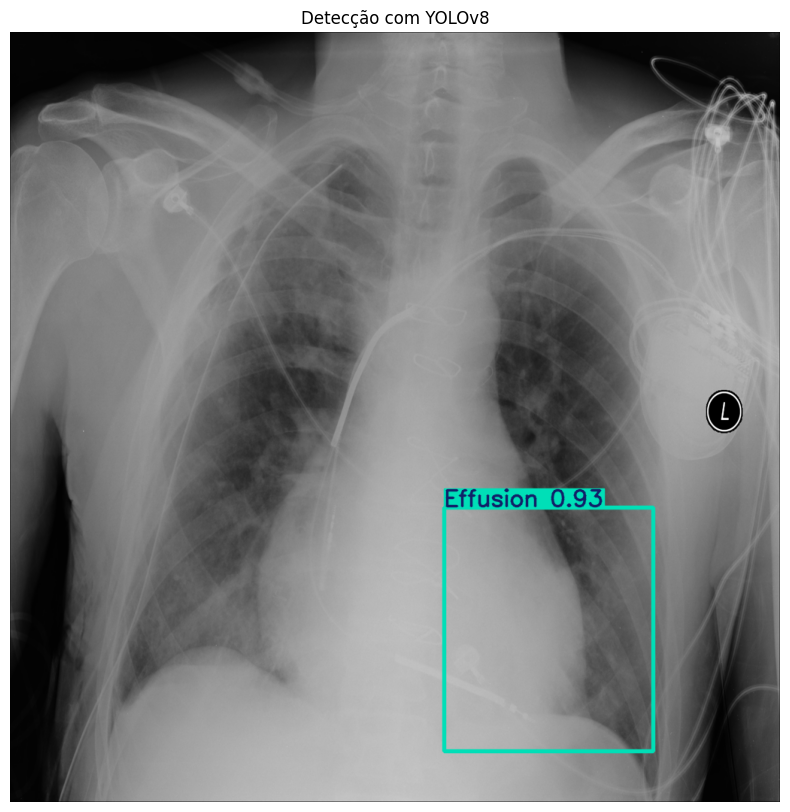

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Carrega o modelo treinado
model = YOLO('runs/detect/yolov8s_chest_final_teste/weights/best.pt')

# Caminho para a imagem de teste
img_path = 'chestx_det10_yolo/images/val/36212.png'  # substitui pelo caminho da tua imagem

# Inferência
results = model(img_path)

# Mostra imagem com bounding boxes diretamente no notebook
result_img = results[0].plot()  # desenha as boxes na imagem

# Conversão BGR para RGB para exibir corretamente com matplotlib
result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# Exibição
plt.figure(figsize=(10, 10))
plt.imshow(result_img_rgb)
plt.axis('off')
plt.title("Detecção com YOLOv8")
plt.show()


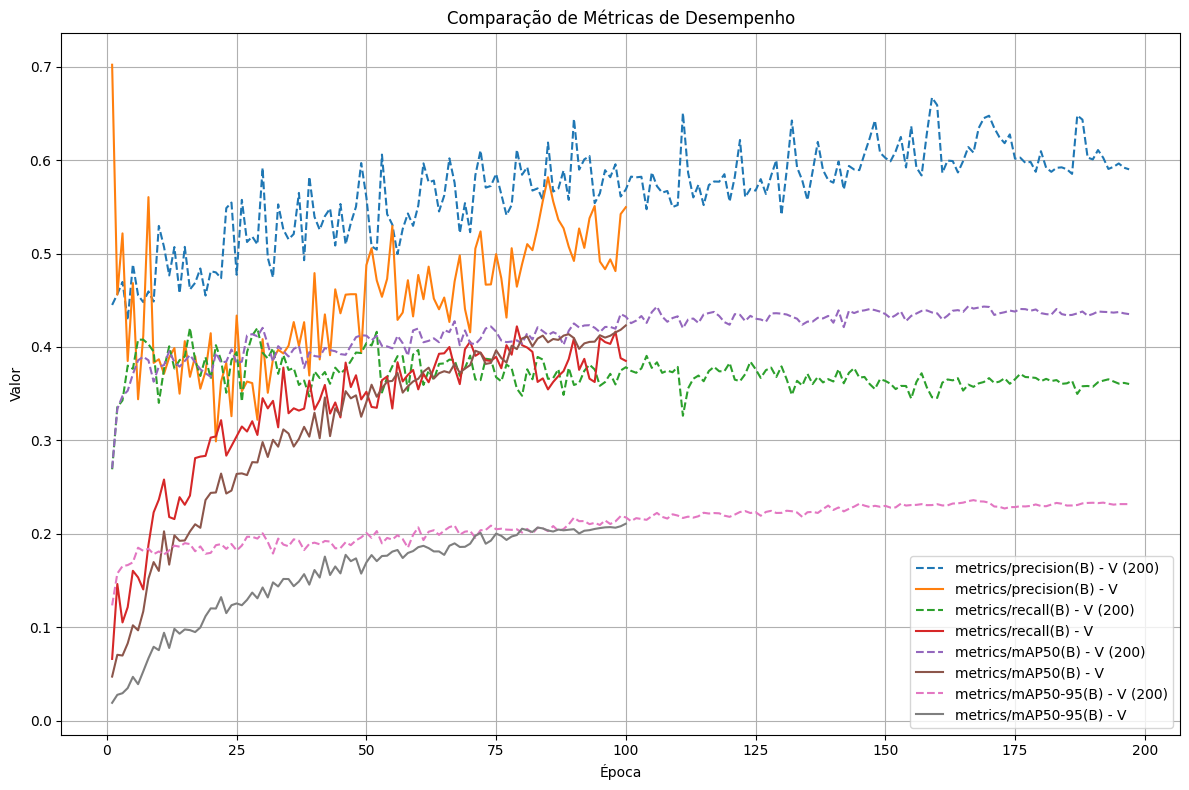

Comparação de Métricas Máximas:

                      V (200)        V   Melhor
metrics/precision(B)  0.66696  0.70211        V
metrics/recall(B)     0.42033  0.42205        V
metrics/mAP50(B)      0.44360  0.42306  V (200)
metrics/mAP50-95(B)   0.23602  0.21081  V (200)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os ficheiros CSV
df_200 = pd.read_csv('/content/runs/detect/yolov8s_chest_final_teste/results.csv')   # Versão 1
df_v = pd.read_csv('/content/runs/detect/yolov8s_chest_improved2/results.csv')   # Versão 2

# Comparar métricas ao longo das épocas
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

plt.figure(figsize=(12, 8))
for metric in metrics:
    plt.plot(df_200['epoch'], df_200[metric], label=f'{metric} - V (200)', linestyle='--')
    plt.plot(df_v['epoch'], df_v[metric], label=f'{metric} - V', linestyle='-')

plt.title("Comparação de Métricas de Desempenho")
plt.xlabel("Época")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparar os valores máximos de cada métrica
max_metrics_200 = df_200[metrics].max()
max_metrics_v2 = df_v[metrics].max()

comparison_df = pd.DataFrame({
    'V (200)': max_metrics_200,
    'V': max_metrics_v2
})
comparison_df['Melhor'] = comparison_df.idxmax(axis=1)

# Mostrar a tabela comparativa
print("Comparação de Métricas Máximas:\n")
print(comparison_df)


In [ ]:
!pip install -U ultralytics


In [ ]:
# Caminho típico da loss
path = '/usr/local/lib/python3.*/dist-packages/ultralytics/nn/modules/loss.py'

# Código da focal loss a injetar
focal_loss_code = '''
import torch
import torch.nn as nn

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25, reduction='none'):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.bce = nn.BCEWithLogitsLoss(reduction='none')

    def forward(self, inputs, targets):
        BCE_loss = self.bce(inputs, targets)
        pt = torch.exp(-BCE_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        return focal_loss
'''

# Injeta no ficheiro da Ultralytics
!sed -i "1s/^/{focal_loss_code}\n/" /usr/local/lib/python3*/dist-packages/ultralytics/nn/modules/loss.py
!sed -i "s/nn.BCEWithLogitsLoss(reduction='none')/FocalLoss(gamma=2.0, alpha=0.25, reduction='none')/" /usr/local/lib/python3*/dist-packages/ultralytics/nn/modules/loss.py


sed: -e expression #1, char 5: unterminated `s' command
sed: can't read /usr/local/lib/python3*/dist-packages/ultralytics/nn/modules/loss.py: No such file or directory


In [ ]:
import shutil

shutil.rmtree('/content/runs/detect/yolov8m_chest_v2_focal_colab')


In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/yolov8s_chest_final_teste/weights/best.pt')  # ou yolov8m.pt para recomeçar

model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=64,
    name='yolov8m_chest_v2_focal_colab',
    patience=20,
    lr0=0.0003,
    weight_decay=0.0001,
    warmup_epochs=2,
    hsv_v=0.4,
    mixup=0.1
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0003, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=runs/detect/yolov8s_chest_final_teste/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_chest_v2_focal_colab, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

train: Scanning /content/chestx_det10_yolo/labels/train.cache... 3001 images, 681 backgrounds, 0 corrupt: 100%|██████████| 3001/3001 [00:00<?, ?it/s]

train: /content/chestx_det10_yolo/images/train/57467.png: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1196.1±1085.3 MB/s, size: 404.5 KB)


val: Scanning /content/chestx_det10_yolo/labels/val.cache... 542 images, 83 backgrounds, 0 corrupt: 100%|██████████| 542/542 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8m_chest_v2_focal_colab/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0003' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0001), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8m_chest_v2_focal_colab
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      23.4G      1.229      1.212      1.398        198        640: 100%|██████████| 47/47 [00:24<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]

                   all        542       1476      0.551      0.388      0.405      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      23.9G      1.221      1.177      1.343        241        640: 100%|██████████| 47/47 [00:25<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


                   all        542       1476      0.475      0.386      0.369      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      23.9G      1.299      1.315      1.401        271        640: 100%|██████████| 47/47 [00:23<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        542       1476      0.489      0.324      0.342      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        24G      1.339      1.377      1.426        233        640: 100%|██████████| 47/47 [00:27<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        542       1476      0.426      0.367       0.35      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      23.9G      1.322      1.329      1.419        205        640: 100%|██████████| 47/47 [00:23<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        542       1476      0.494      0.364      0.367      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      23.9G      1.305      1.303      1.405        236        640: 100%|██████████| 47/47 [00:23<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


                   all        542       1476      0.431      0.395      0.361      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      23.9G      1.311      1.294      1.408        224        640: 100%|██████████| 47/47 [00:22<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]

                   all        542       1476       0.46      0.372      0.352      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      23.8G      1.281      1.269      1.386        178        640: 100%|██████████| 47/47 [00:23<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        542       1476      0.465      0.352      0.344      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      23.9G      1.274      1.278       1.38        208        640: 100%|██████████| 47/47 [00:24<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        542       1476      0.484      0.356      0.355      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      23.7G      1.281      1.256       1.38        288        640: 100%|██████████| 47/47 [00:23<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        542       1476      0.489      0.356      0.346      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      23.9G      1.254      1.218       1.37        234        640: 100%|██████████| 47/47 [00:22<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.23s/it]

                   all        542       1476      0.447      0.356      0.342       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      23.9G      1.243      1.183      1.344        176        640: 100%|██████████| 47/47 [00:22<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


                   all        542       1476      0.402      0.424      0.373      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      23.9G      1.239      1.195      1.352        199        640: 100%|██████████| 47/47 [00:28<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        542       1476      0.476      0.362      0.342      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      23.9G      1.235      1.191      1.351        264        640: 100%|██████████| 47/47 [00:24<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        542       1476      0.489      0.377      0.375      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      23.9G      1.229      1.176      1.337        238        640: 100%|██████████| 47/47 [00:22<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]

                   all        542       1476      0.402      0.386      0.361      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        24G      1.214      1.177      1.334        210        640: 100%|██████████| 47/47 [00:21<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        542       1476      0.549      0.326       0.36      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      23.9G      1.187      1.116      1.308        217        640: 100%|██████████| 47/47 [00:28<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]

                   all        542       1476      0.436      0.381      0.351      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      23.9G      1.185      1.117      1.311        205        640: 100%|██████████| 47/47 [00:25<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        542       1476      0.437      0.365      0.355      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      23.7G      1.185      1.116      1.317        244        640: 100%|██████████| 47/47 [00:22<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.97s/it]

                   all        542       1476      0.489      0.388      0.384      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      23.8G      1.165      1.101      1.307        219        640: 100%|██████████| 47/47 [00:22<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        542       1476      0.495      0.372      0.373      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      23.9G      1.165      1.092      1.295        224        640: 100%|██████████| 47/47 [00:28<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        542       1476      0.538      0.359       0.38      0.181
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



21 epochs completed in 0.173 hours.
Optimizer stripped from runs/detect/yolov8m_chest_v2_focal_colab/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8m_chest_v2_focal_colab/weights/best.pt, 52.0MB

Validating runs/detect/yolov8m_chest_v2_focal_colab/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


                   all        542       1476      0.543      0.395      0.404        0.2
           Atelectasis         48         51       0.37      0.314      0.311      0.106
         Calcification         38         67      0.543      0.284      0.307     0.0917
         Consolidation        289        446      0.607      0.525      0.541      0.261
              Effusion        252        372      0.519      0.484      0.449      0.183
             Emphysema         39         66       0.63      0.803      0.754      0.582
              Fibrosis         82        120      0.451      0.375      0.386      0.198
              Fracture         76        115      0.661       0.33       0.37      0.128
                  Mass         30         31      0.711      0.258      0.319       0.18
                Nodule         77        166      0.488      0.295      0.302       0.14
          Pneumothorax         35         42      0.447      0.286      0.297      0.128
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7890abe305d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [ ]:
# prompt: zip runs and export to google drive, quera a pasta toda /content/runs

# Zip the 'runs' directory
!zip -r runs.zip /content/runs

# Copy the zip file to Google Drive
# Replace 'MyDrive/ModelosYOLO/' with the desired path in your Google Drive
!cp runs.zip /content/drive/MyDrive/apvc_yolo/modelos

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/yolov8s_chest_improved/ (stored 0%)
updating: content/runs/detect/yolov8s_chest_improved/weights/ (stored 0%)
updating: content/runs/detect/yolov8s_chest_improved/weights/last.pt (deflated 8%)
updating: content/runs/detect/yolov8s_chest_improved/weights/best.pt (deflated 8%)
updating: content/runs/detect/yolov8s_chest_improved/val_batch0_labels.jpg (deflated 12%)
updating: content/runs/detect/yolov8s_chest_improved/train_batch0.jpg (deflated 7%)
updating: content/runs/detect/yolov8s_chest_improved/BoxF1_curve.png (deflated 6%)
updating: content/runs/detect/yolov8s_chest_improved/val_batch2_labels.jpg (deflated 14%)
updating: content/runs/detect/yolov8s_chest_improved/results.csv (deflated 62%)
updating: content/runs/detect/yolov8s_chest_improved/args.yaml (deflated 52%)
updating: content/runs/detect/yolov8s_chest_improved/labels_correlogram.jpg (deflated 39%)
updating: content/r